## Forecast Green Energy

They have captured the estimated total energy demand from the past 12 years on an hourly basis. Now, the government of Green Energy is looking for a data scientist to understand the data and forecast the total energy demand for the next 3 years based on past trends.
Your task at hand is to build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.



### Inport datasets

In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install numpy==1.21.3

In [3]:
!pip install modin

In [4]:
import pandas as pd

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
os.chdir('E:/python_notepad/time series/time series/hakathon')

<IPython.core.display.Javascript object>

In [6]:
data_train=pd.read_csv('train_IxoE5JN.csv',parse_dates=['datetime'])
data_test=pd.read_csv('test_WudNWDM.csv',parse_dates=['datetime'])

In [7]:
data_train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [8]:
data_test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


### EDA

In [9]:
data_train.drop(columns='row_id',inplace=True)
data_test.drop(columns='row_id',inplace=True)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  94992 non-null  datetime64[ns]
 1   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [11]:
data_train.isnull().sum()

datetime       0
energy      1900
dtype: int64

In [12]:
df=data_train.fillna(method='bfill')

In [13]:
df.isnull().sum()

datetime    0
energy      0
dtype: int64

In [14]:
df.set_index('datetime',drop=True,inplace=True)

In [15]:
df[df.index.duplicated()]                #check duplicate values

,energy
datetime,


### Visualisation of data

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

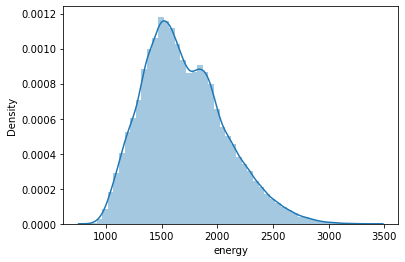

In [16]:
sns.distplot(df['energy'])



array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

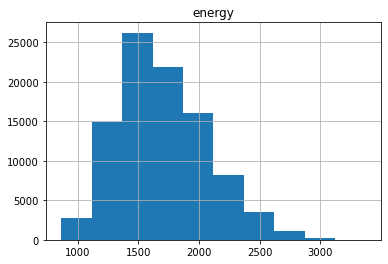

In [17]:
df.hist()

Data is not an normally distributed. histogram shows tha data is possitivly skewd

In [18]:
df['energy']=np.log(df['energy'])

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

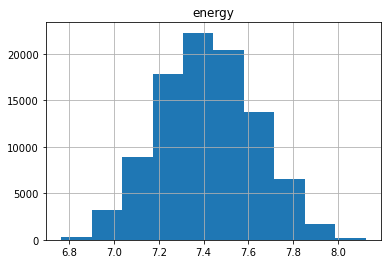

In [19]:
df.hist()

After taking the logarithmic transformation data is normally distributed

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

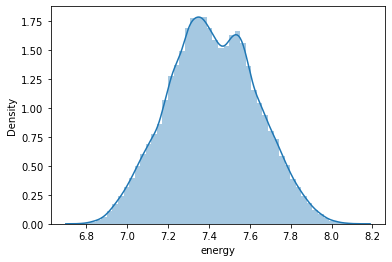

In [20]:
sns.distplot(df['energy'])

### Plot the maximum,minimum and mean values of each year

<AxesSubplot:xlabel='datetime'>

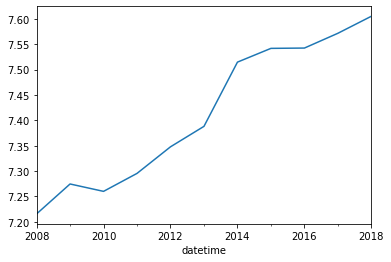

In [21]:
df.energy.resample(rule='A').mean().plot()

<AxesSubplot:xlabel='datetime'>

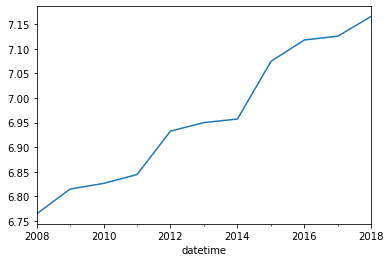

In [22]:
df.energy.resample(rule='A').min().plot()

<AxesSubplot:xlabel='datetime'>

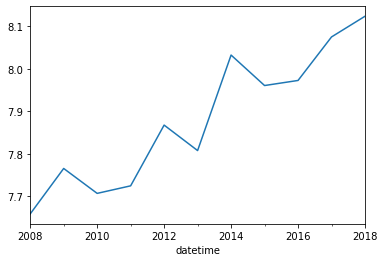

In [23]:
df.energy.resample(rule='A').max().plot()

### Plot the maximum,minimum and mean values of each quarter

<AxesSubplot:xlabel='datetime'>

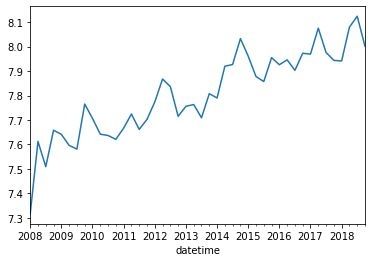

In [24]:
df.resample(rule='QS').max()['energy'].plot()

<AxesSubplot:xlabel='datetime'>

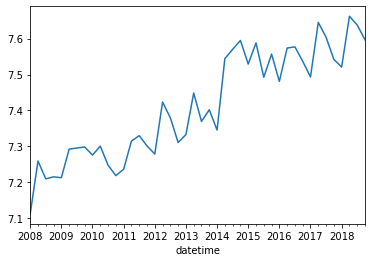

In [25]:
df.resample(rule='QS').mean()['energy'].plot()

### plot the graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

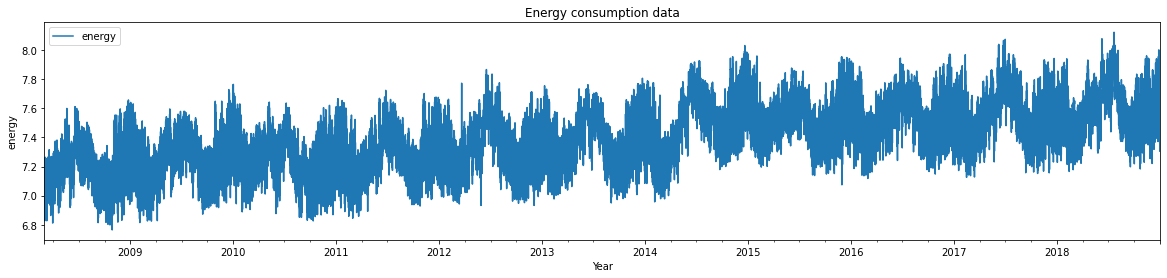

In [26]:
plt.rcParams["figure.figsize"]= (20,4)
df.plot()
plt.xlabel('Year') 
plt.ylabel('energy') 
# displaying the title
plt.title("Energy consumption data")
plt.show()

### take copy of dataset and perform the basic analysis

In [27]:
df1=df.copy()

Mean is: 7.417191987579355


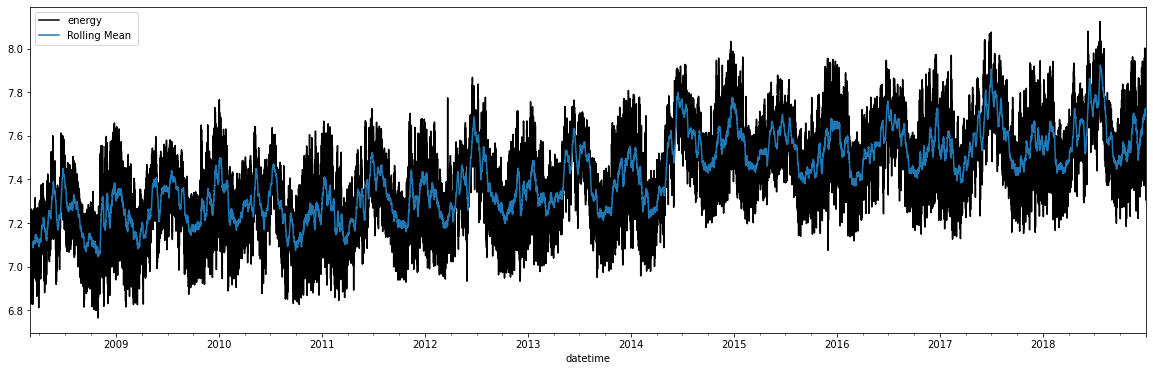

In [28]:
df.plot(figsize=(20,6), legend=True, label="Data", cmap='gray')
df["energy"].rolling(200, center=False).mean().plot(legend=True, label="Rolling Mean ");
print("Mean is:", df["energy"].mean())

In [29]:
df1.head()

,energy
datetime,
2008-03-01 00:00:00,7.138856
2008-03-01 01:00:00,6.999004
2008-03-01 02:00:00,6.962478
2008-03-01 03:00:00,6.941907
2008-03-01 04:00:00,6.933749


In [30]:
### 12 months 
## Use Techniques Differencing
df1['energy_1']=df1['energy']-df1['energy'].shift(12)

In [31]:
from statsmodels.tsa.stattools import adfuller

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [32]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [33]:
adf_test(df1['energy_1'].dropna())

ADF Statistics: -43.6703559144868
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

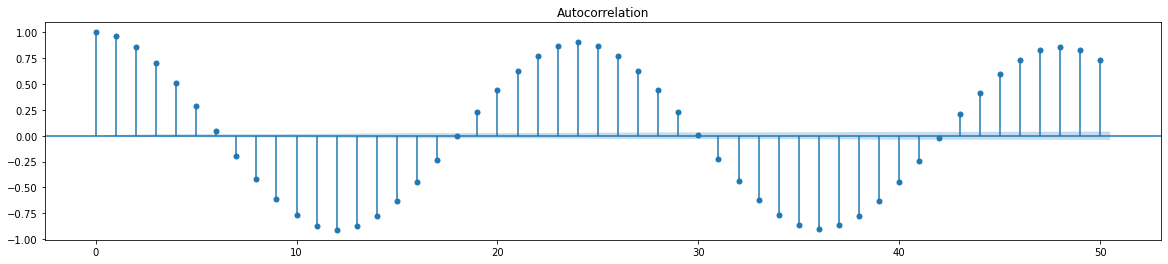

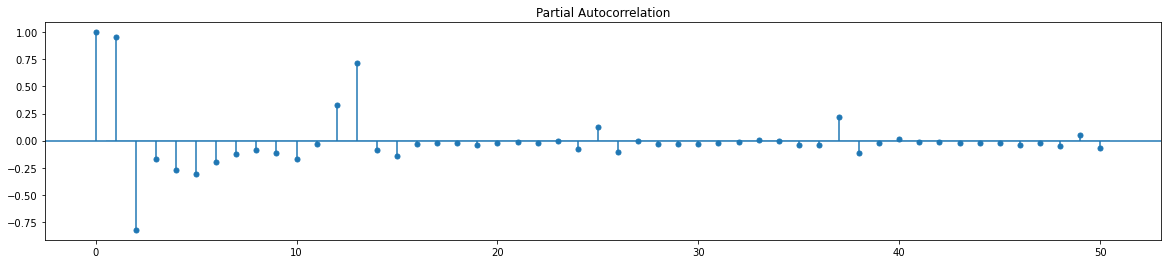

In [35]:
acf=plot_acf(df1["energy_1"].dropna())
pacf=plot_pacf(df1["energy_1"].dropna())

### SARIMA MODEL

In [36]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2017,1,1,0,0,0)
test_dataset_end=datetime(2018,12,31,23,0,0)

In [37]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model_SARIMA=SARIMAX(train_data['energy'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model_SARIMA_fit.summary()

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [ ]:
pred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['energy'])

In [ ]:
pip install modin[ray]

In [ ]:
import modin.pandas as pd

In [ ]:
df['energy']=df['energy']-df['energy'].shift(1)

In [ ]:
adf_test(df['energy'].dropna())